# **0. Kaggle 데이터 연결**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bonecar","key":"16e8cf29f7ed598055d79be78b65be57"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mbkinaci/fruit-images-for-object-detection

Dataset URL: https://www.kaggle.com/datasets/mbkinaci/fruit-images-for-object-detection
License(s): CC0-1.0
 18% 5.00M/28.4M [00:00<00:00, 38.5MB/s]
100% 28.4M/28.4M [00:00<00:00, 136MB/s] 


In [4]:
!unzip -o /content/fruit-images-for-object-detection.zip -d /content/data

Archive:  /content/fruit-images-for-object-detection.zip
  inflating: /content/data/test_zip/test/apple_77.jpg  
  inflating: /content/data/test_zip/test/apple_77.xml  
  inflating: /content/data/test_zip/test/apple_78.jpg  
  inflating: /content/data/test_zip/test/apple_78.xml  
  inflating: /content/data/test_zip/test/apple_79.jpg  
  inflating: /content/data/test_zip/test/apple_79.xml  
  inflating: /content/data/test_zip/test/apple_80.jpg  
  inflating: /content/data/test_zip/test/apple_80.xml  
  inflating: /content/data/test_zip/test/apple_81.jpg  
  inflating: /content/data/test_zip/test/apple_81.xml  
  inflating: /content/data/test_zip/test/apple_82.jpg  
  inflating: /content/data/test_zip/test/apple_82.xml  
  inflating: /content/data/test_zip/test/apple_83.jpg  
  inflating: /content/data/test_zip/test/apple_83.xml  
  inflating: /content/data/test_zip/test/apple_84.jpg  
  inflating: /content/data/test_zip/test/apple_84.xml  
  inflating: /content/data/test_zip/test/apple_

# **1. Import Libraries**

In [5]:
# Importing moduls
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2. # openCV

from keras.utils import to_categorical  # one-hot encoding
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

# **2. Processing Data**

In [26]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []
train_labels = []
shape = (200,200)
train_path = '/content/data/train_zip/train'

for filename in os.listdir('/content/data/train_zip/train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path, filename))
        ## numpy array 형식 (height, width, 3)

        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])

        # Resize all images to a specific shape
        img = cv2.resize(img,shape) ## numpy array 형식 (200,200,3)으로 변환됨

        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)
## 리스트의 형식을 array로 변환하여 딥러닝에 맞도록 변환
## 4차원의 형태 (num_images, 200,200,3)

# Splitting Training data into train and validation dataset
X_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, random_state = 1)

In [27]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appneding labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we aren't going to use it while training

test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/data/test_zip/test'

for filename in os.listdir('/content/data/test_zip/test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path, filename))

        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])

        # Resize all images to a specific shape
        img = cv2.resize(img, shape)

        test_images.append(img)

# Converting test_images to array
test_images = np.array(test_images)
## 리스트의 형식을 array로 변환하여 딥러닝에 맞도록 변환
## 4차원의 형태 (num_images, 200,200,3)

# **3. Visualizing Data**

[ True False False False]


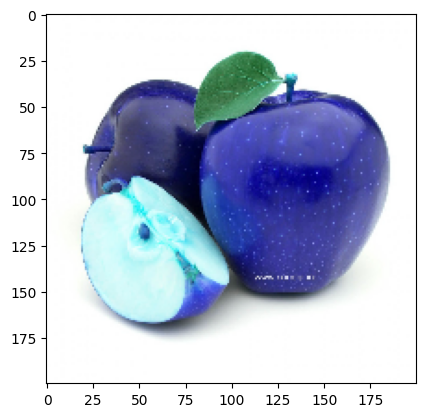

In [28]:
# Visualizing Training Data
print(train_labels[0])
plt.imshow(train_images[0])

[False False False  True]


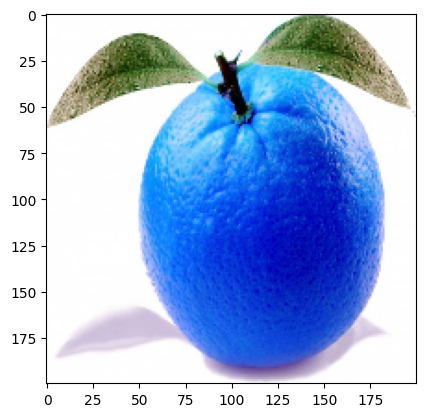

In [29]:
# Visualizing Training Data
print(train_labels[5])
plt.imshow(train_images[5])

## **4. Training Model**

In [34]:
# Creating a Sequential model
model = Sequential()
model.add(Conv2D(kernel_size=(3,3), filters = 32, activation='relu', input_shape = (200,200,3)))
model.add(Conv2D(filters=30, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30, kernel_size = (3,3), activation = 'relu'))

model.add(Flatten())

model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

model.compile(loss = 'categorical_crossentropy',
              metrics=['acc'],
              optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Model Summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 196, 196, 30)        │           8,670 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 98, 98, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 96, 96, 30)          │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 46, 46, 30)          │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 63480)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │       1,269,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 15)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              64 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295,825 (4.94 MB)

 Trainable params: 1,295,825 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size = 50, validation_data=(x_val,y_val))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - acc: 0.2493 - loss: 5.5765 - val_acc: 0.3167 - val_loss: 2.8818
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - acc: 0.3047 - loss: 2.3218 - val_acc: 0.2500 - val_loss: 2.8823
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - acc: 0.3798 - loss: 2.0729 - val_acc: 0.3333 - val_loss: 2.8625
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - acc: 0.3607 - loss: 2.2347 - val_acc: 0.4167 - val_loss: 2.8491
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - acc: 0.4116 - loss: 2.3361 - val_acc: 0.3333 - val_loss: 2.8320
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - acc: 0.3807 - loss: 2.0909 - val_acc: 0.3667 - val_loss: 2.8076
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - acc: 0.4487 - loss: 2.0062 - val_acc: 0.4667 - val_loss: 2.5613
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - acc: 0.5582 - loss: 1.6475 - val_acc: 0.2500 - val_loss: 1.3446
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - acc: 0.3582 - loss: 1.2622 - va

## **5. Summarize Model**

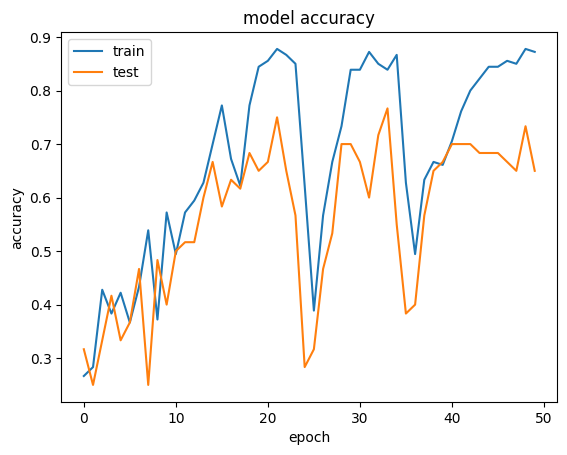

In [37]:
# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

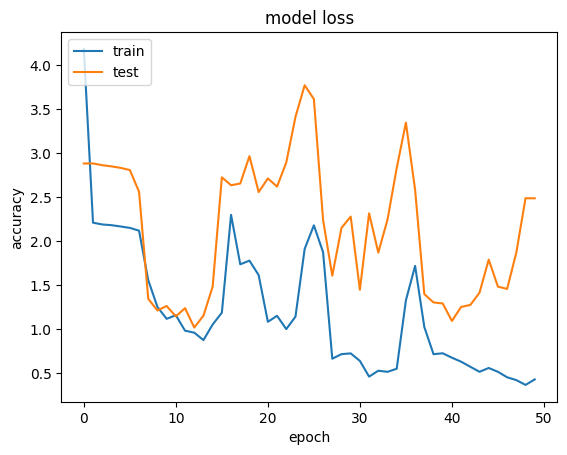

In [38]:
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [21]:
# Evaluate model on validation data
evaluate = model.evaluate(x_val, y_val)
print(evaluate)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.3257 - loss: 10.8685
[11.014032363891602, 0.3166666626930237]


In [22]:
# Testing predictions and the actual label
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = {0:'apple', 1:'banana', 2:'miexd', 3:'orange'}

print("Actual: ", checklabel)
print("Predicted: ", output[np.argmax(predict)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
Actual:  ['orange']
Predicted:  banana


* 기존 코드를 이용하여 모델을 학습시켰을 때, 학습 성능이 좋지 않았음. 그래서 활성화 함수를 tanh에서 relu로 바꿔서 학습을 시켰고, 학습 성능 자체는 개선되어 보임. 하지만 모델의 정확도가 학습 과정에서 큰 폭으로 움직이는 것을 볼 수 있으며, loss가 nan으로 나타나는 경우도 확인하였음.
* 이에 대한 원인은 여러가지 있는 것으로 보임.
    
    1) 데이터 정규화: 이 코드에서는 데이터 정규화를 진행하지 않음. 데이터 정규화에 따른 영향 파악 필요
    
    2) 잘못된 초기화 또는 가중치 폭발: 아래 GPT 답변 참고
    
    •	원인: 모델의 가중치 초기화가 잘못되었거나 특정 층에서 가중치가 급격히 커지는 경우(가중치 폭발)가 발생할 수 있습니다. 특히, 활성화 함수로 ReLU를 사용할 때 일부 뉴런이 활성화되지 않으면 기울기 소실 또는 폭발 문제가 발생할 수 있습니다.

    •	해결 방안: 다른 가중치 초기화 방법(예: He 초기화, Xavier 초기화)을 시도하거나, ReLU 대신 LeakyReLU 같은 변형된 활성화 함수를 사용하는 것이 도움이 될 수 있습니다. 또한, 기울기 폭발을 방지하기 위해 Gradient Clipping을 사용해 볼 수 있습니다.

* 이런 문제 해결을 위해 다음번 코드 실사에서는 모델 성능 개선과 안정화를 위해 새로운 방법을 적용해보고자 함.